In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D

import numpy as np
from glob import glob

In [ ]:
IMAGE_SIZE = [224, 224]

# Download the dataset from the given link: https://www.mediafire.com/file/1aa78vcs4zbkx8o/indian_currency_dataset.zip/file

train_path = 'indian_currency_dataset/Train'
valid_path = 'indian_currency_dataset/Test'

In [ ]:
folders = glob('indian_currency_dataset/Train/*')

In [ ]:
folders

['/content/drive/MyDrive/indian_currency_dataset/Train/1Hundrednote',
 '/content/drive/MyDrive/indian_currency_dataset/Train/Twentynote',
 '/content/drive/MyDrive/indian_currency_dataset/Train/Tennote',
 '/content/drive/MyDrive/indian_currency_dataset/Train/5Hundrednote',
 '/content/drive/MyDrive/indian_currency_dataset/Train/2Thousandnote',
 '/content/drive/MyDrive/indian_currency_dataset/Train/Fiftynote',
 '/content/drive/MyDrive/indian_currency_dataset/Train/2Hundrednote']

In [ ]:
Classifier=Sequential()

Classifier.add(Conv2D(32,(3,3), input_shape=(224,224,3), activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Conv2D(32,(3,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Flatten())

Classifier.add(Dense(units = 128, activation = 'relu'))
Classifier.add(Dense(units = 7, activation = 'softmax'))

In [ ]:
Classifier.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   height_shift_range=0.2,
                                   featurewise_center=True,
                                   rotation_range=0.4,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/indian_currency_dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 153 images belonging to 7 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/indian_currency_dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 42 images belonging to 7 classes.


In [ ]:
# fit the model
from PIL import _imaging
from PIL import Image
import PIL
# Run the cell. It will take some time to execute
r = Classifier.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-9-86347eaea2e8>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = Classifier.fit_generator(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/50
5/5 [==============================] - 57s 12s/step - loss: 7.2212 - accuracy: 0.1373 - val_loss: 2.7439 - val_accuracy: 0.2381
Epoch 2/50
5/5 [==============================] - 14s 3s/step - loss: 2.1695 - accuracy: 0.1961 - val_loss: 1.8756 - val_accuracy: 0.2381
Epoch 3/50
5/5 [==============================] - 14s 3s/step - loss: 1.8090 - accuracy: 0.2418 - val_loss: 1.6951 - val_accuracy: 0.2381
Epoch 4/50
5/5 [==============================] - 13s 3s/step - loss: 1.5858 - accuracy: 0.3660 - val_loss: 1.4159 - val_accuracy: 0.4524
Epoch 5/50
5/5 [==============================] - 14s 3s/step - loss: 1.3428 - accuracy: 0.4967 - val_loss: 1.3535 - val_accuracy: 0.3571
Epoch 6/50
5/5 [==============================] - 14s 3s/step - loss: 1.0180 - accuracy: 0.6667 - val_loss: 1.2663 - val_accuracy: 0.5000
Epoch 7/50
5/5 [==============================] - 12s 2s/step - loss: 0.9018 - accuracy: 0.6732 - val_loss: 1.2165 - val_accuracy: 0.5000
Epoch 8/50
5/5 [=================

In [ ]:
r.history

{'loss': [7.22121524810791,
  2.1694841384887695,
  1.8089627027511597,
  1.5857700109481812,
  1.342794418334961,
  1.0179635286331177,
  0.9018431305885315,
  0.7217550873756409,
  0.6318566203117371,
  0.5203230977058411,
  0.37464621663093567,
  0.3906112611293793,
  0.4475206434726715,
  0.5456418395042419,
  0.46458184719085693,
  0.2461770474910736,
  0.17267681658267975,
  0.15625958144664764,
  0.12675981223583221,
  0.13853490352630615,
  0.13248170912265778,
  0.12455186247825623,
  0.10712999850511551,
  0.0871560350060463,
  0.0646740198135376,
  0.05814787372946739,
  0.04119986668229103,
  0.06763254106044769,
  0.047585830092430115,
  0.058220040053129196,
  0.029150262475013733,
  0.04304905980825424,
  0.05520490184426308,
  0.08058707416057587,
  0.05246017873287201,
  0.0523323118686676,
  0.05658181384205818,
  0.032247819006443024,
  0.02522878721356392,
  0.022170843556523323,
  0.014462186954915524,
  0.02161499485373497,
  0.015171738341450691,
  0.053699094802

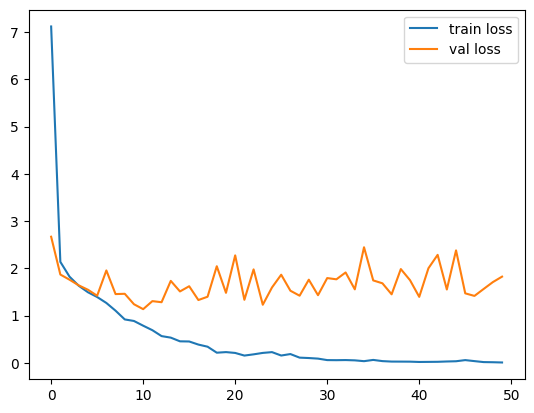

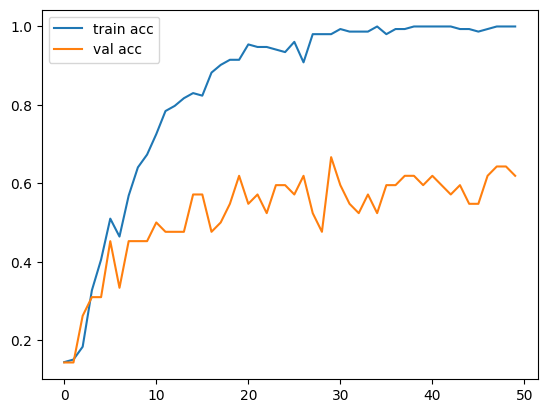

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

Classifier.save('MiniProject.h5')

In [ ]:
y_pred = Classifier.predict(test_set)

2/2 [==============================] - 1s 133ms/step


In [ ]:
y_pred

array([[9.98517573e-01, 1.09003389e-15, 7.47831393e-07, 1.48171152e-03,
        4.63969793e-15, 1.45104928e-10, 1.75011339e-09],
       [2.27918562e-07, 5.22171758e-05, 2.26095858e-06, 9.71731901e-01,
        1.62112610e-05, 3.86819863e-07, 2.81968601e-02],
       [2.42574010e-16, 9.99998271e-01, 4.63628701e-13, 7.80362086e-09,
        1.00700093e-09, 1.46914670e-06, 2.87007992e-07],
       [5.06693232e-06, 5.35314150e-15, 9.81083481e-09, 1.76611366e-06,
        9.99991238e-01, 1.62564140e-06, 2.08998500e-07],
       [5.51236335e-05, 8.04499447e-01, 1.09935971e-03, 6.23365566e-02,
        1.98031776e-02, 1.03721730e-01, 8.48473702e-03],
       [1.55074233e-07, 3.12981931e-19, 1.98553493e-10, 7.30114493e-07,
        9.99997556e-01, 2.56395727e-09, 1.53801068e-06],
       [1.12583197e-03, 1.32138739e-05, 9.95375097e-01, 1.27387457e-05,
        9.51679394e-05, 7.32117389e-09, 3.37812724e-03],
       [5.50570898e-03, 2.59380926e-07, 9.94489074e-01, 4.96183839e-06,
        2.58384585e-08, 2

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([[9.98517573e-01, 1.09003389e-15, 7.47831393e-07, 1.48171152e-03,
        4.63969793e-15, 1.45104928e-10, 1.75011339e-09],
       [2.27918562e-07, 5.22171758e-05, 2.26095858e-06, 9.71731901e-01,
        1.62112610e-05, 3.86819863e-07, 2.81968601e-02],
       [2.42574010e-16, 9.99998271e-01, 4.63628701e-13, 7.80362086e-09,
        1.00700093e-09, 1.46914670e-06, 2.87007992e-07],
       [5.06693232e-06, 5.35314150e-15, 9.81083481e-09, 1.76611366e-06,
        9.99991238e-01, 1.62564140e-06, 2.08998500e-07],
       [5.51236335e-05, 8.04499447e-01, 1.09935971e-03, 6.23365566e-02,
        1.98031776e-02, 1.03721730e-01, 8.48473702e-03],
       [1.55074233e-07, 3.12981931e-19, 1.98553493e-10, 7.30114493e-07,
        9.99997556e-01, 2.56395727e-09, 1.53801068e-06],
       [1.12583197e-03, 1.32138739e-05, 9.95375097e-01, 1.27387457e-05,
        9.51679394e-05, 7.32117389e-09, 3.37812724e-03],
       [5.50570898e-03, 2.59380926e-07, 9.94489074e-01, 4.96183839e-06,
        2.58384585e-08, 2